In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import IsolationForest

In [183]:
weather = pd.read_csv(r'C:\Users\annab\OneDrive\STAT 764\Data Sets\weather.csv')
df = pd.read_csv(r'C:\Users\annab\OneDrive\STAT 764\Data Sets\flights_set0.csv')
planes = pd.read_csv(r'C:\Users\annab\OneDrive\STAT 764\Data Sets\planes.csv')
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,8,29,912,-3,1033,-6,DL,N322NB,873,JFK,BOS,41,187,9,12
1,2013,6,20,1739,-6,1907,-18,MQ,N506MQ,3301,LGA,RDU,67,431,17,39
2,2013,2,21,638,-7,845,-1,US,N558UW,1281,EWR,CLT,89,529,6,38
3,2013,12,18,1444,-1,1821,12,UA,N518UA,841,JFK,LAX,352,2475,14,44
4,2013,12,25,2203,27,2327,28,B6,N198JB,702,JFK,BUF,59,301,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26183,2013,3,7,1156,-4,1343,-17,US,N713UW,1443,JFK,CLT,83,541,11,56
26184,2013,8,5,1305,5,1600,5,VX,N835VA,411,JFK,LAX,331,2475,13,5
26185,2013,5,13,1611,-4,1828,-12,MQ,N521MQ,4657,LGA,ATL,106,762,16,11
26186,2013,11,7,1834,29,2034,44,WN,N295WN,195,LGA,STL,140,888,18,34


EDA

C:\Users\annab\AppData\Local\Temp\ipykernel_8248\3032518824.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['dep_delay'], shade=True, color="blue") #departure delay is skewed right so add median


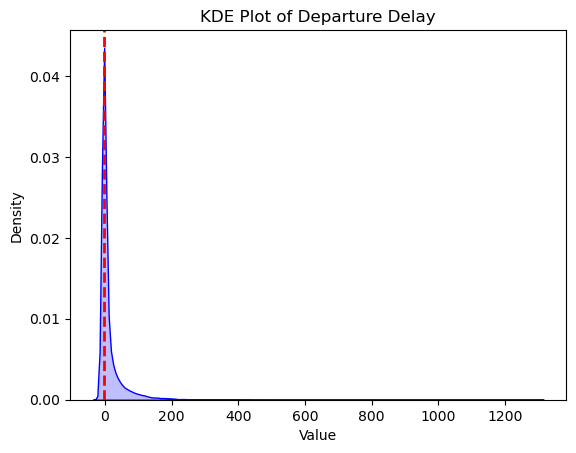

C:\Users\annab\AppData\Local\Temp\ipykernel_8248\3032518824.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['arr_delay'], shade=True, color="blue") #arrival delay is skewed right so add median


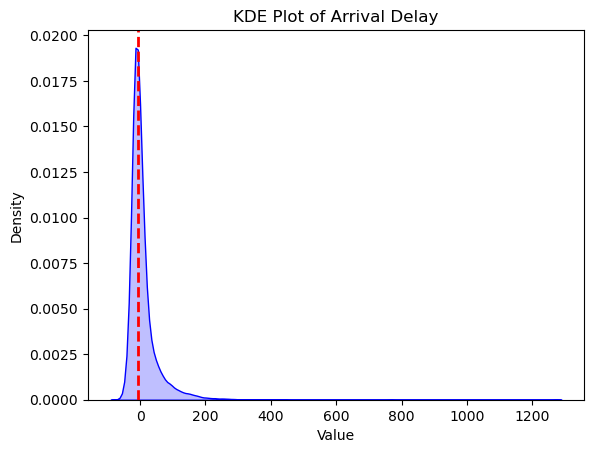

C:\Users\annab\AppData\Local\Temp\ipykernel_8248\3032518824.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['air_time'], shade=True, color="blue") #data does not seem skewed


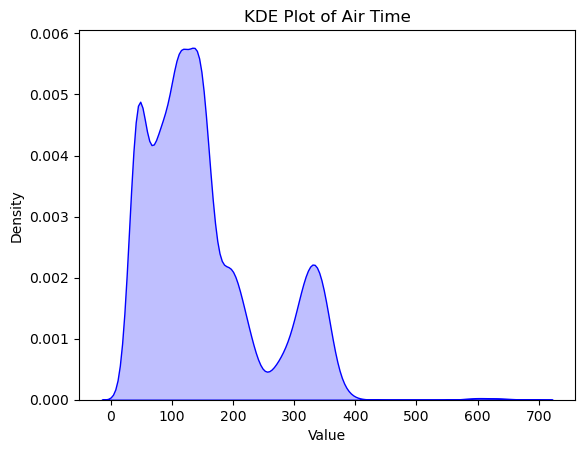

C:\Users\annab\AppData\Local\Temp\ipykernel_8248\3032518824.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['distance'], shade=True, color="blue") #data does not seem skewed


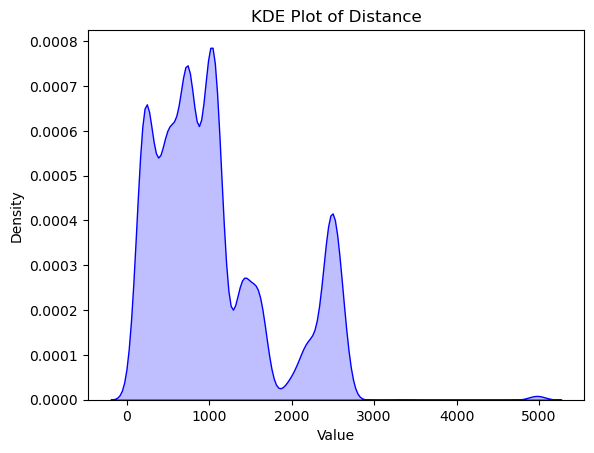

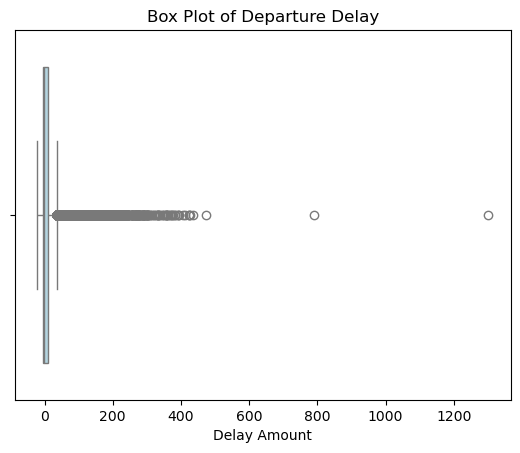

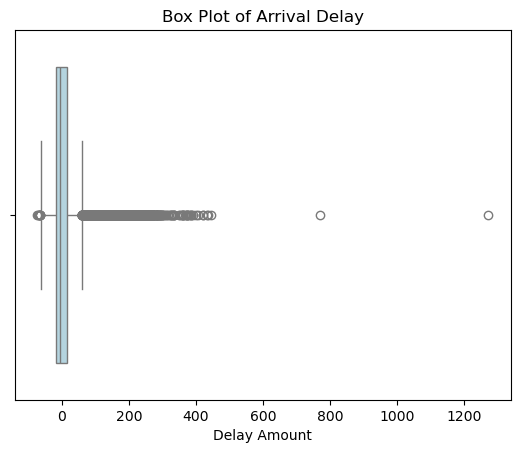

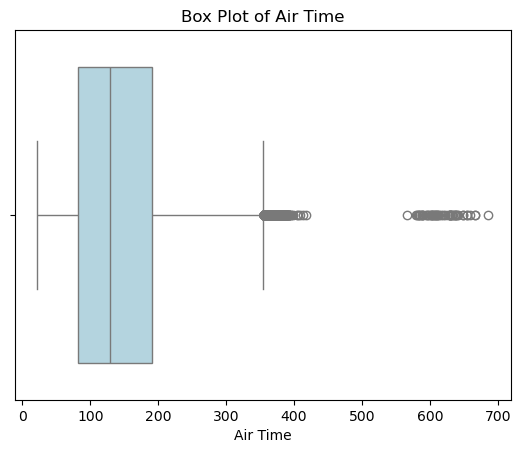

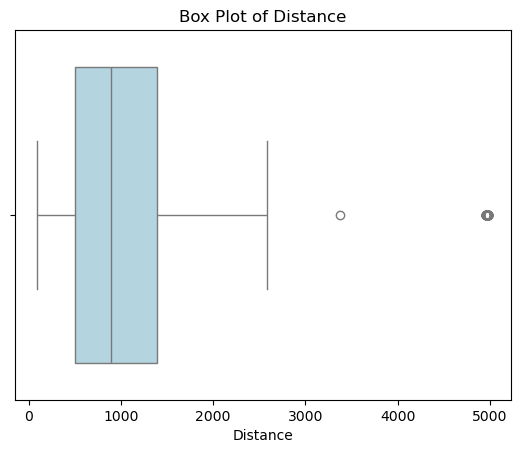

In [184]:
#check for missingness
na_data = df.isna()
na_data.sum().sum() # no NA values
df[(df['hour'] == 0) & (df['minute'] == 0)] # I checked all columns for possible 0 instead of NA except delay amounts, hour and minute I checked together because one or the other could be 0 but not both

#check spread of all quantatative variables
sns.kdeplot(df['dep_delay'], shade=True, color="blue") #departure delay is skewed right so add median
plt.title("KDE Plot of Departure Delay")
med_dep_delay = df['dep_delay'].median()
plt.axvline(med_dep_delay, color="red", linestyle="--", linewidth=2, label=f"Median = {med_dep_delay:.2f}")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

sns.kdeplot(df['arr_delay'], shade=True, color="blue") #arrival delay is skewed right so add median
plt.title("KDE Plot of Arrival Delay")
med_arr_delay = df['arr_delay'].median()
plt.axvline(med_arr_delay, color="red", linestyle="--", linewidth=2, label=f"Median = {med_arr_delay:.2f}")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

sns.kdeplot(df['air_time'], shade=True, color="blue") #data does not seem skewed
plt.title("KDE Plot of Air Time")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

sns.kdeplot(df['distance'], shade=True, color="blue") #data does not seem skewed
plt.title("KDE Plot of Distance")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

#box plots to go with the density plots
sns.boxplot(x=df['dep_delay'], color='lightblue') # we can really see the skewness now
plt.title("Box Plot of Departure Delay")
plt.xlabel("Delay Amount")
plt.show()

sns.boxplot(x=df['arr_delay'], color='lightblue') # same here
plt.title("Box Plot of Arrival Delay")
plt.xlabel("Delay Amount")
plt.show()

sns.boxplot(x=df['air_time'], color='lightblue') # less skewed but maybe some?
plt.title("Box Plot of Air Time")
plt.xlabel("Air Time")
plt.show()

sns.boxplot(x=df['distance'], color='lightblue') # same here
plt.title("Box Plot of Distance")
plt.xlabel("Distance")
plt.show()

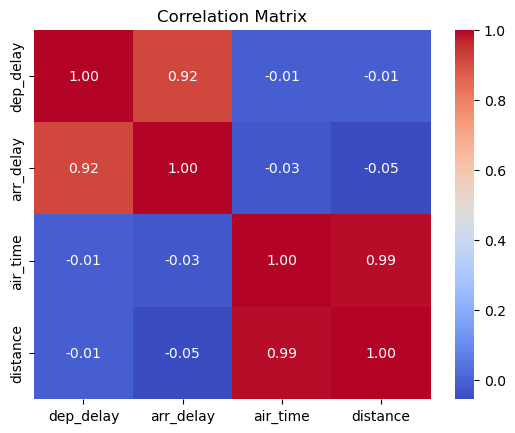

,month,day,dep_time,dep_delay,arr_time,carrier,tailnum,flight,origin,dest,distance,hour,minute
0,8,29,912,-3,1033,DL,N322NB,873,JFK,BOS,187,9,12
1,6,20,1739,-6,1907,MQ,N506MQ,3301,LGA,RDU,431,17,39
2,2,21,638,-7,845,US,N558UW,1281,EWR,CLT,529,6,38
3,12,18,1444,-1,1821,UA,N518UA,841,JFK,LAX,2475,14,44
4,12,25,2203,27,2327,B6,N198JB,702,JFK,BUF,301,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26183,3,7,1156,-4,1343,US,N713UW,1443,JFK,CLT,541,11,56
26184,8,5,1305,5,1600,VX,N835VA,411,JFK,LAX,2475,13,5
26185,5,13,1611,-4,1828,MQ,N521MQ,4657,LGA,ATL,762,16,11
26186,11,7,1834,29,2034,WN,N295WN,195,LGA,STL,888,18,34


In [185]:
#correlation matrix to see if some variables are too correlated
quan_only = ['dep_delay','arr_delay','air_time','distance']
correlation_matrix = df[quan_only].corr()

# Display the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#since we are predicting the departure delay we can get rid of arrival delay - there is also a really high correlation between the two on the matrix.. obviously
#we will get rid of air_time since it is really correlated to distance and we don't know air_time when predicting departure delay
#I also got rid of year because we know its 2013
df = df.drop(columns = ['air_time','arr_delay','year'])
df

Data Quality Check and Feature Leakage

In [186]:
df.duplicated().sum() # no duplicated rows
df['month'].value_counts()
df['day'].value_counts()
df[df['distance']<0] # all good for minute, hour, dep_time, distance
df['carrier'].value_counts() # check for inconsistencies

#all of the data looks good
df.dtypes

#feature leakage
#get rid of arr_time, 
df = df.drop(columns = ['arr_time'])
df

,month,day,dep_time,dep_delay,carrier,tailnum,flight,origin,dest,distance,hour,minute
0,8,29,912,-3,DL,N322NB,873,JFK,BOS,187,9,12
1,6,20,1739,-6,MQ,N506MQ,3301,LGA,RDU,431,17,39
2,2,21,638,-7,US,N558UW,1281,EWR,CLT,529,6,38
3,12,18,1444,-1,UA,N518UA,841,JFK,LAX,2475,14,44
4,12,25,2203,27,B6,N198JB,702,JFK,BUF,301,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...
26183,3,7,1156,-4,US,N713UW,1443,JFK,CLT,541,11,56
26184,8,5,1305,5,VX,N835VA,411,JFK,LAX,2475,13,5
26185,5,13,1611,-4,MQ,N521MQ,4657,LGA,ATL,762,16,11
26186,11,7,1834,29,WN,N295WN,195,LGA,STL,888,18,34


Feature Engineering

In [187]:
#merge planes 'seats' column onto the df with common tailnum
df = df.merge(planes[['seats','tailnum']], on='tailnum', how='right')



Now use the data frame that James created with features

In [188]:
data = pd.read_csv(r'C:\Users\annab\OneDrive\STAT 764\Data Sets\flight_data_full.csv')
data = data.drop(columns = ['air_time','year','Unnamed: 0'])
data

,month,day,dep_time,dep_delay,carrier,origin,dest,distance,hour,minute,...,pressure,visib,freezing,type,manufacturer,model,engines,seats,engine,year_manufactured
0,8,29,912,-3,DL,JFK,BOS,187,9,12,...,1016.4,10.0,0,Fixed wing multi engine,AIRBUS INDUSTRIE,A319-114,2,145,Turbo-fan,2001.0
1,7,14,1438,-2,DL,LGA,DTW,502,14,38,...,1025.0,10.0,0,Fixed wing multi engine,AIRBUS INDUSTRIE,A319-114,2,145,Turbo-fan,2001.0
2,4,26,1238,-7,DL,LGA,DTW,502,12,38,...,1028.1,10.0,0,Fixed wing multi engine,AIRBUS INDUSTRIE,A319-114,2,145,Turbo-fan,2001.0
3,7,18,1759,69,DL,LGA,MEM,963,17,59,...,1014.0,10.0,0,Fixed wing multi engine,AIRBUS INDUSTRIE,A319-114,2,145,Turbo-fan,2001.0
4,3,20,1624,-6,DL,JFK,DTW,509,16,24,...,1009.3,10.0,0,Fixed wing multi engine,AIRBUS INDUSTRIE,A319-114,2,145,Turbo-fan,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22253,2,26,1315,7,FL,LGA,ATL,762,13,15,...,1023.0,10.0,0,Fixed wing multi engine,BOEING,717-200,2,100,Turbo-fan,2001.0
22254,4,6,1359,-1,WN,LGA,BNA,764,13,59,...,1025.3,10.0,0,Fixed wing multi engine,BOEING,737-7H4,2,140,Turbo-fan,2006.0
22255,4,30,1523,-7,AA,JFK,SFO,2586,15,23,...,1026.4,10.0,0,Fixed wing multi engine,BOEING,767-323,2,330,Turbo-fan,1988.0
22256,9,16,1752,-13,OO,LGA,CLE,419,17,52,...,1018.6,10.0,0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,2,80,Turbo-fan,2004.0


Outlier Analysis

In [189]:
#try univariate approach
quan_cols = ['dep_delay','distance','dep_time','visib','freezing','seats','year_manufactured', 'temp','dewp','humid','wind_dir','wind_speed','precip','pressure']

for column in quan_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)] #55 rows
outliers

data = data.loc[~data.index.isin(outliers.index)]
data

,month,day,dep_time,dep_delay,carrier,origin,dest,distance,hour,minute,...,pressure,visib,freezing,type,manufacturer,model,engines,seats,engine,year_manufactured
0,8,29,912,-3,DL,JFK,BOS,187,9,12,...,1016.4,10.0,0,Fixed wing multi engine,AIRBUS INDUSTRIE,A319-114,2,145,Turbo-fan,2001.0
1,7,14,1438,-2,DL,LGA,DTW,502,14,38,...,1025.0,10.0,0,Fixed wing multi engine,AIRBUS INDUSTRIE,A319-114,2,145,Turbo-fan,2001.0
2,4,26,1238,-7,DL,LGA,DTW,502,12,38,...,1028.1,10.0,0,Fixed wing multi engine,AIRBUS INDUSTRIE,A319-114,2,145,Turbo-fan,2001.0
3,7,18,1759,69,DL,LGA,MEM,963,17,59,...,1014.0,10.0,0,Fixed wing multi engine,AIRBUS INDUSTRIE,A319-114,2,145,Turbo-fan,2001.0
4,3,20,1624,-6,DL,JFK,DTW,509,16,24,...,1009.3,10.0,0,Fixed wing multi engine,AIRBUS INDUSTRIE,A319-114,2,145,Turbo-fan,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22253,2,26,1315,7,FL,LGA,ATL,762,13,15,...,1023.0,10.0,0,Fixed wing multi engine,BOEING,717-200,2,100,Turbo-fan,2001.0
22254,4,6,1359,-1,WN,LGA,BNA,764,13,59,...,1025.3,10.0,0,Fixed wing multi engine,BOEING,737-7H4,2,140,Turbo-fan,2006.0
22255,4,30,1523,-7,AA,JFK,SFO,2586,15,23,...,1026.4,10.0,0,Fixed wing multi engine,BOEING,767-323,2,330,Turbo-fan,1988.0
22256,9,16,1752,-13,OO,LGA,CLE,419,17,52,...,1018.6,10.0,0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,2,80,Turbo-fan,2004.0


GridSearchCV(cv=5, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='neg_mean_squared_error')

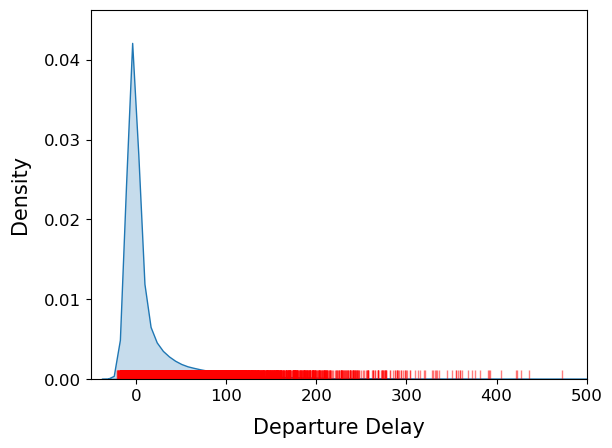

In [190]:
#linear regression for departure delay

#one hot encode the categorical variables
one_hot = pd.get_dummies(data, dtype = int)
one_hot

#make a denstiy rug plut for the one hot encoded data frame
fig, ax = plt.subplots()
sns.kdeplot(one_hot['dep_delay'], fill=True, ax=ax)
sns.rugplot(one_hot['dep_delay'], color='red', alpha=0.5, ax=ax)
ax.set_xlabel('Departure Delay', fontsize=15, labelpad=10)
ax.set_ylabel('Density', fontsize=15, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(-50, 500) 


target = 'dep_delay'
X_train, X_test, y_train, y_test = train_test_split(one_hot.drop(columns=target), one_hot[target], test_size=0.30, random_state=42)

#scale and transform
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#elastic net
elastic_net = ElasticNet(random_state=42)

param_grid = {
    'alpha': [0.1, 1, 10, 100],  # sklearn likes to call lambda "alpha", it's bogus but we play along...
    'l1_ratio': [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]  # sklearn likes to call alpha "l1_ratio", which is fine - just know this for your reference
}

# This is actually doing the cross-fold validation (which involves fitting our model for each split). 
grid_search = GridSearchCV(
    estimator=elastic_net, 
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # use RMSE
    n_jobs=-1,  # use all available processors
)

grid_search.fit(X_train, y_train)

Best Model RMSE: 15.197256028271726
Baseline RMSE (using median): 41.995887342442614


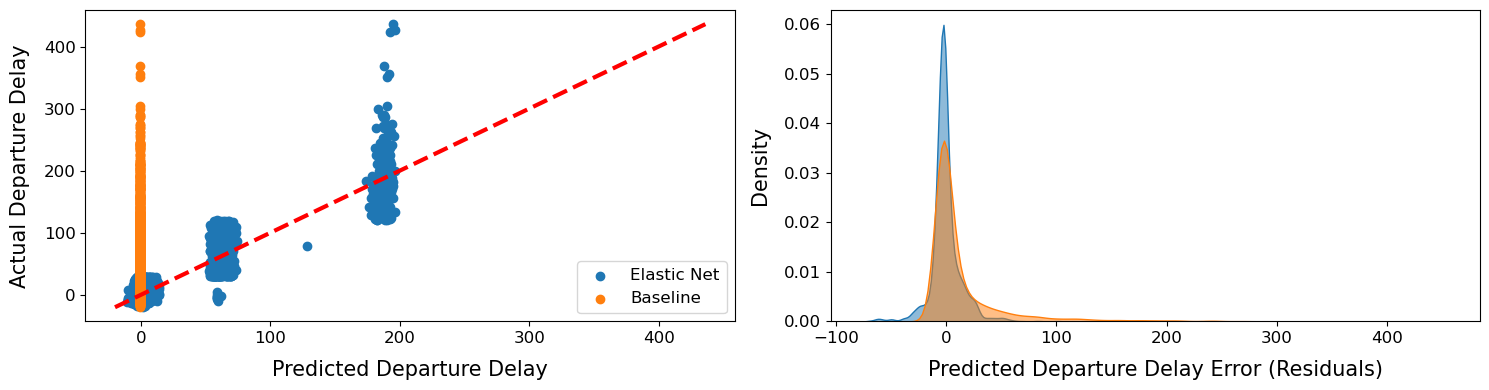

In [191]:
pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False)

#we want to look at our best model vs a baseline
y_pred = grid_search.predict(X_test)

# here's our baseline model 
y_baseline_pred = np.full_like(y_test, np.median(y_train))

best_model_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline_pred))

print(f"Best Model RMSE: {best_model_rmse}")
print(f"Baseline RMSE (using median): {baseline_rmse}") # out elastic net model significantly out performs the baseline which is good


fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# scatterplot of predictions vs reality for both models
ax[0].scatter(y_pred, y_test, label="Elastic Net")
ax[0].scatter(y_baseline_pred, y_test, label="Baseline")

# Adding a 45-degree line
lims = [
    [min(y_test.min(), y_pred.min(), y_baseline_pred.min()), 
     max(y_test.max(), y_pred.max(), y_baseline_pred.max())],  # Limits for both axes
]
# Create a line with equal x and y limits
ax[0].plot(lims[0], lims[0], ls='--', color='red', lw=3)

# kde of residuals for both models
residuals = y_test - y_pred
residuals_baseline = y_test - y_baseline_pred
sns.kdeplot(residuals, ax=ax[1], fill=True, alpha=0.5)
sns.kdeplot(residuals_baseline, ax=ax[1], fill=True, alpha=0.5)

# aesthetics
ax[0].legend(fontsize=12)
ax[0].set_xlabel("Predicted Departure Delay", fontsize=15, labelpad=10)
ax[0].set_ylabel("Actual Departure Delay", fontsize=15, labelpad=10)
ax[1].set_xlabel("Predicted Departure Delay Error (Residuals)", fontsize=15, labelpad=10)
ax[1].set_ylabel("Density", fontsize=15, labelpad=10)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()